In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('useful_data_2.csv')

C:\Users\palas\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
data.columns

Index(['Unnamed: 0', 'channelGrouping', 'date', 'device', 'fullVisitorId',
       'geoNetwork', 'sessionId', 'socialEngagementType', 'totals',
       'trafficSource', 'visitId', 'visitNumber', 'visitStartTime', 'browser',
       'browserSize', 'browserVersion', 'deviceCategory', 'flashVersion',
       'isMobile', 'language', 'mobileDeviceBranding', 'mobileDeviceInfo',
       'mobileDeviceMarketingName', 'mobileDeviceModel', 'mobileInputSelector',
       'operatingSystem', 'operatingSystemVersion', 'screenColors',
       'screenResolution', 'city', 'cityId', 'continent', 'country',
       'latitude', 'longitude', 'metro', 'networkDomain', 'networkLocation',
       'region', 'subContinent', 'bounces', 'hits', 'newVisits', 'pageviews',
       'transactionRevenue', 'visits', 'adContent', 'adwordsClickInfo',
       'campaign', 'campaignCode', 'isTrueDirect', 'keyword', 'medium',
       'referralPath', 'source'],
      dtype='object')

In [13]:
data = data[['channelGrouping','date','fullVisitorId','sessionId', 'socialEngagementType', 'visitId', 'visitNumber', 'visitStartTime','browser', 'deviceCategory','isMobile', 'operatingSystem', 'city', 'continent', 'country', 'networkDomain','region', 'subContinent', 'bounces', 'hits', 'newVisits','pageviews',  'visits',  'isTrueDirect',  'medium', 'source']]

In [6]:
data = data.replace({'not available in demo dataset': np.nan}, regex=True)

In [7]:
print(pd.isnull(data).describe().loc['freq']/903653)

Unnamed: 0                          1
channelGrouping                     1
date                                1
device                              1
fullVisitorId                       1
geoNetwork                          1
sessionId                           1
socialEngagementType                1
totals                              1
trafficSource                       1
visitId                             1
visitNumber                         1
visitStartTime                      1
browser                             1
browserSize                         1
browserVersion                      1
deviceCategory                      1
flashVersion                        1
isMobile                            1
language                            1
mobileDeviceBranding                1
mobileDeviceInfo                    1
mobileDeviceMarketingName           1
mobileDeviceModel                   1
mobileInputSelector                 1
operatingSystem                     1
operatingSys

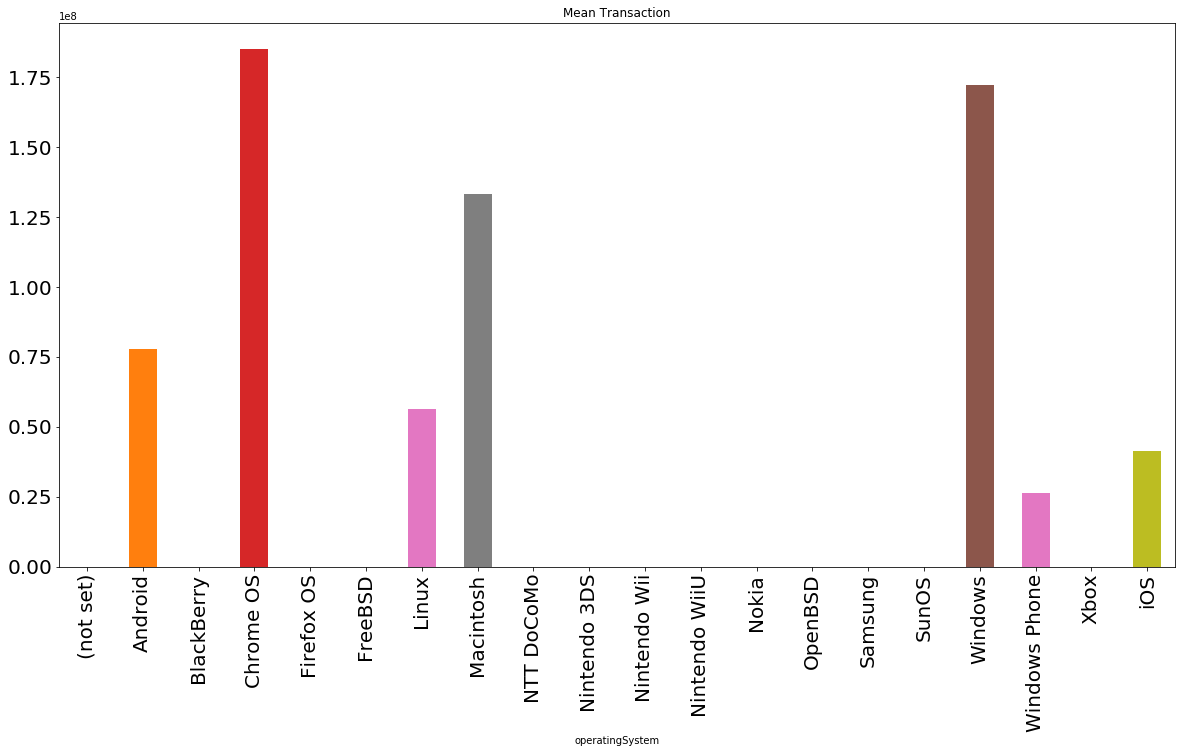

In [59]:
d = data.groupby(['operatingSystem'])['transactionRevenue'].mean()
d.plot.bar(title = 'Mean Transaction',figsize=(20,10),fontsize=20)

In [39]:
d1 = data.groupby('operatingSystem')['channelGrouping'].count()

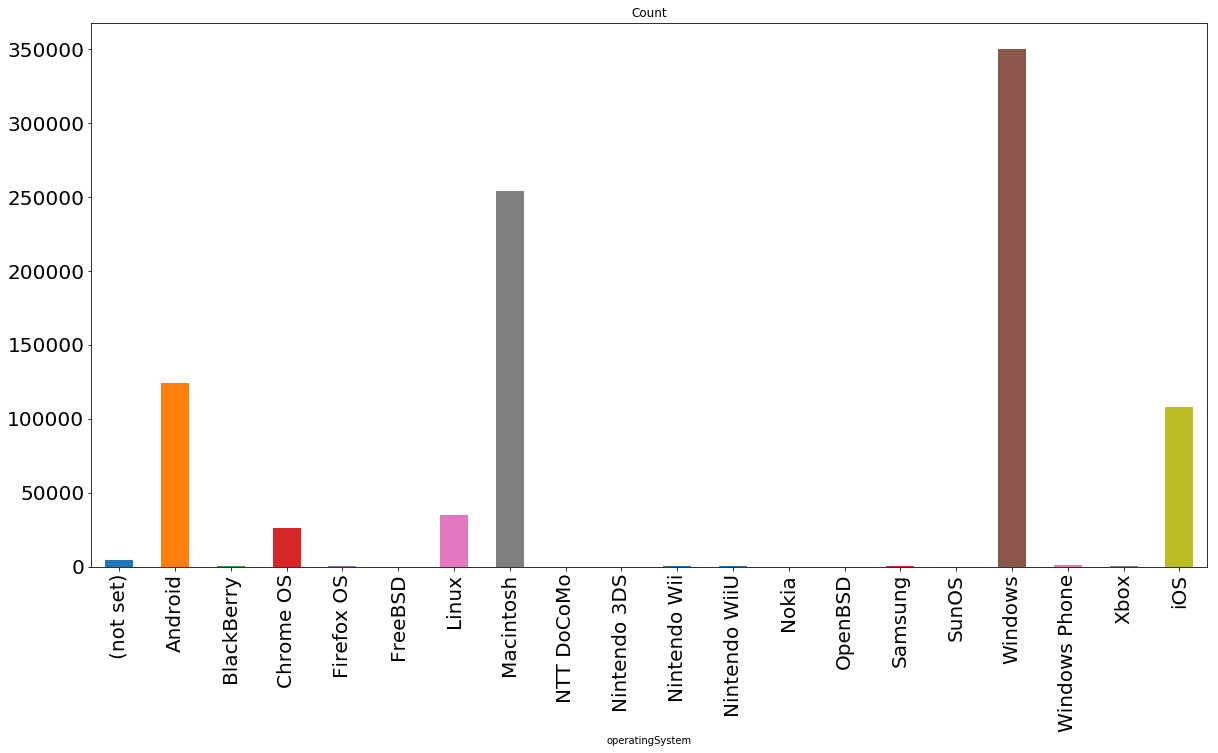

In [60]:
d1.plot.bar(title = 'Count',figsize=(20,10),fontsize=20)


# Can be seen that source from Dfa or Mail.google.com or direct has heighest mean of transaction value

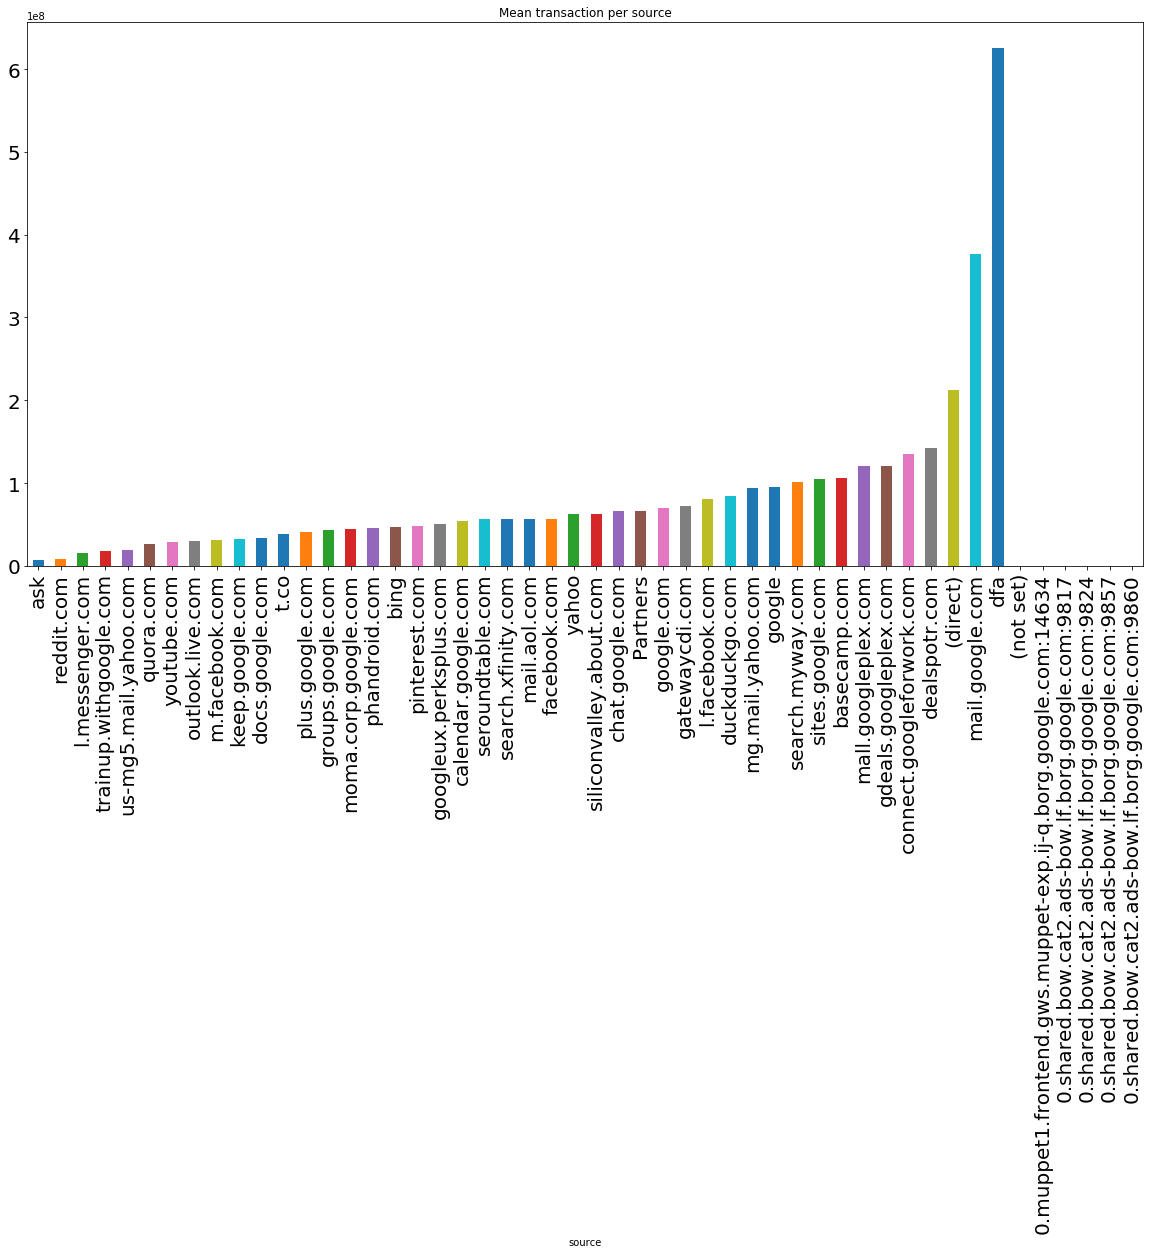

In [58]:
d2.sort_values().head(n=50).plot.bar(title='Mean transaction per source',figsize=(20,10),fontsize=20)

In [36]:
data[['visitNumber','transactionRevenue']][data.transactionRevenue.isnull()==False].groupby('visitNumber')['transactionRevenue'].count().sort_values(ascending=False)

visitNumber
1      4465
2      2511
3      1431
4       878
5       555
6       356
7       246
8       175
9       149
10      131
11       76
12       73
14       50
13       47
16       35
15       29
17       25
18       20
21       18
20       17
22       17
24       17
19       15
23       12
26       12
31       10
25       10
28        9
29        8
30        6
       ... 
300       1
303       1
305       1
111       1
108       1
312       1
84        1
63        1
67        1
69        1
71        1
72        1
74        1
75        1
76        1
78        1
82        1
85        1
106       1
88        1
91        1
92        1
95        1
96        1
97        1
99        1
102       1
103       1
105       1
61        1
Name: transactionRevenue, Length: 109, dtype: int64

In [41]:
data[['visitNumber','transactionRevenue']][data.transactionRevenue.isnull()==False].groupby('visitNumber')['transactionRevenue'].max().sort_values()

visitNumber
41     3.500000e+06
75     7.190000e+06
88     1.519000e+07
111    1.519000e+07
131    1.699000e+07
61     1.899000e+07
82     1.899000e+07
71     1.899000e+07
123    1.899000e+07
45     2.150000e+07
109    2.348000e+07
300    2.396000e+07
55     2.500000e+07
303    2.577000e+07
74     2.718000e+07
97     2.997000e+07
138    2.999000e+07
53     3.199000e+07
67     3.499000e+07
59     3.798000e+07
48     3.913000e+07
92     3.995000e+07
76     3.999000e+07
99     3.999000e+07
103    3.999000e+07
119    4.199000e+07
51     4.479000e+07
100    4.479000e+07
116    5.207000e+07
77     5.274000e+07
           ...     
296    1.424250e+09
9      1.470360e+09
13     1.498200e+09
20     1.573250e+09
21     1.653570e+09
16     1.679700e+09
11     2.021700e+09
14     2.091810e+09
305    2.332560e+09
104    2.490000e+09
312    2.495000e+09
28     2.538480e+09
12     2.687400e+09
7      2.870000e+09
246    3.022200e+09
259    3.670920e+09
3      4.085500e+09
1      4.280700e+09
4      4

In [4]:
corr =  data.corr()
corr.style.background_gradient()

C:\Users\palas\Anaconda3\lib\site-packages\matplotlib\colors.py:504: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


,Unnamed: 0,date,fullVisitorId,visitId,visitNumber,visitStartTime,isMobile,bounces,hits,newVisits,pageviews,transactionRevenue,visits
Unnamed: 0,1,0.114845,-0.00235828,0.0990011,0.000482479,0.0990011,0.0325984,nan,0.00685591,nan,0.00764317,0.00925656,nan
date,0.114845,1,-0.000922422,0.880936,0.00753626,0.880936,0.146148,nan,-0.018395,nan,-0.0121461,0.008099,nan
fullVisitorId,-0.00235828,-0.000922422,1,-0.000963753,-0.0239413,-0.000963747,0.00172806,nan,-0.00018296,nan,4.77313e-05,-0.000313888,nan
visitId,0.0990011,0.880936,-0.000963753,1,0.00206887,1,0.144332,nan,-0.0277009,nan,-0.0222592,-0.00344651,nan
visitNumber,0.000482479,0.00753626,-0.0239413,0.00206887,1,0.00206888,-0.0376666,nan,0.0413169,nan,0.0433627,0.308895,nan
visitStartTime,0.0990011,0.880936,-0.000963747,1,0.00206888,1,0.144332,nan,-0.0277008,nan,-0.0222591,-0.00344655,nan
isMobile,0.0325984,0.146148,0.00172806,0.144332,-0.0376666,0.144332,1,nan,-0.0303667,nan,-0.0301986,-0.0526233,nan
bounces,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
hits,0.00685591,-0.018395,-0.00018296,-0.0277009,0.0413169,-0.0277008,-0.0303667,nan,1,nan,0.983205,0.141973,nan
newVisits,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


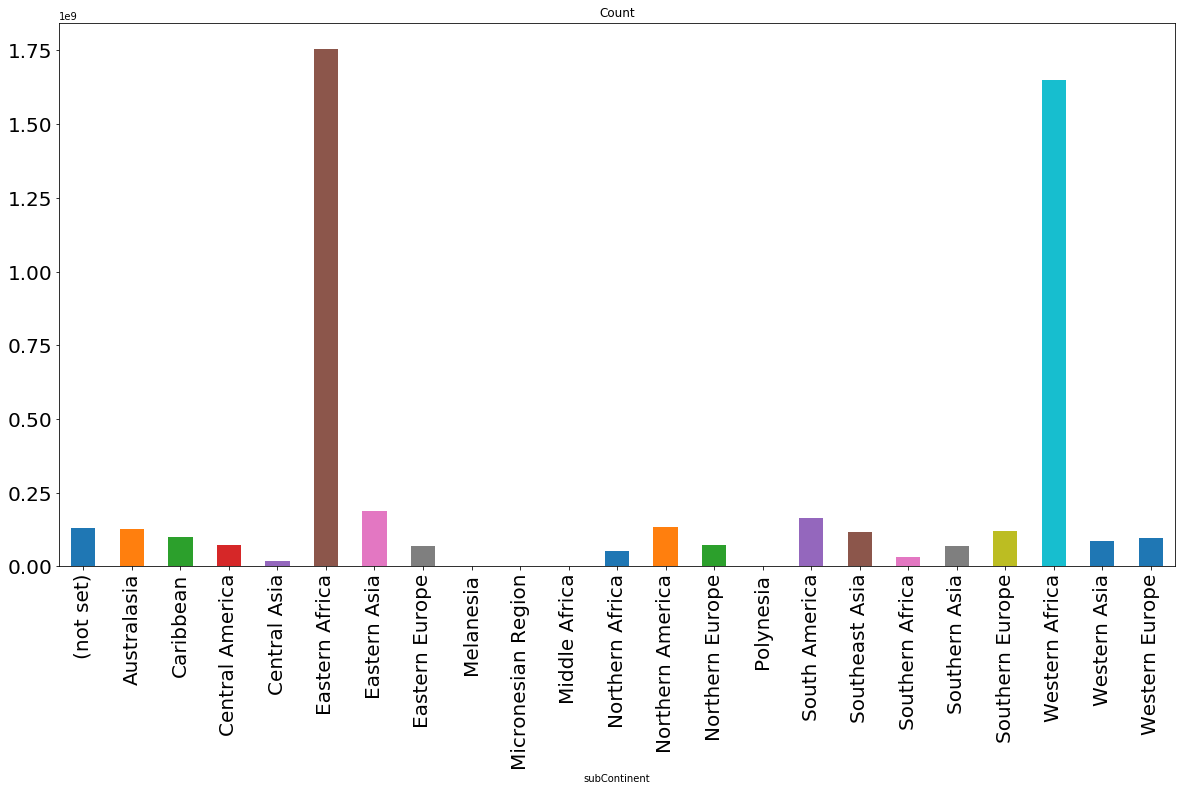

In [8]:
data.groupby('subContinent')['transactionRevenue'].mean().plot.bar(title = 'Count',figsize=(20,10),fontsize=20)

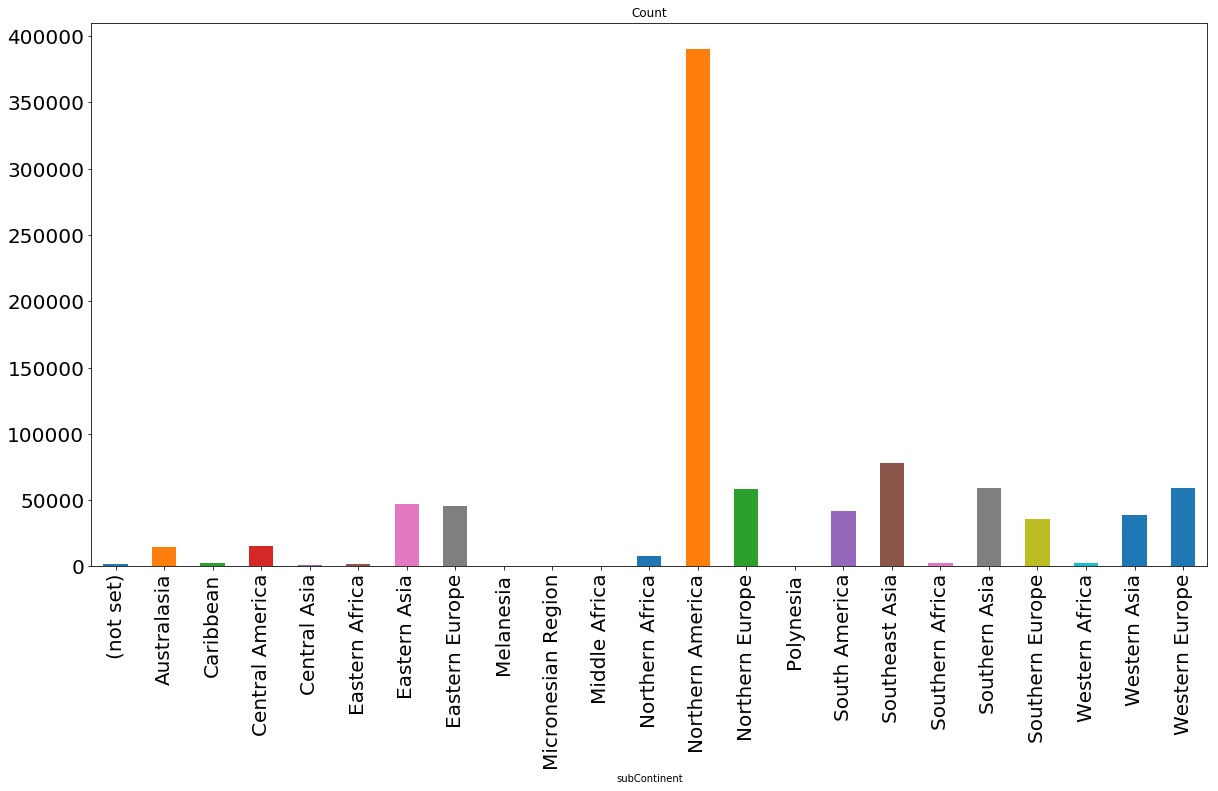

In [9]:
data.groupby('subContinent')['channelGrouping'].count().plot.bar(title = 'Count',figsize=(20,10),fontsize=20)

In [4]:
data.date

0         20160902
1         20160902
2         20160902
3         20160902
4         20160902
5         20160902
6         20160902
7         20160902
8         20160902
9         20160902
10        20160902
11        20160902
12        20160902
13        20160902
14        20160902
15        20160902
16        20160902
17        20160902
18        20160902
19        20160902
20        20160902
21        20160902
22        20160902
23        20160902
24        20160902
25        20160902
26        20160902
27        20160902
28        20160902
29        20160902
            ...   
903623    20170104
903624    20170104
903625    20170104
903626    20170104
903627    20170104
903628    20170104
903629    20170104
903630    20170104
903631    20170104
903632    20170104
903633    20170104
903634    20170104
903635    20170104
903636    20170104
903637    20170104
903638    20170104
903639    20170104
903640    20170104
903641    20170104
903642    20170104
903643    20170104
903644    20

In [11]:
from datetime import datetime
data.date.apply(lambda x: datetime.strptime(str(x), '%Y%m%d').strftime('%m/%d/%Y'))

0         09/02/2016
1         09/02/2016
2         09/02/2016
3         09/02/2016
4         09/02/2016
5         09/02/2016
6         09/02/2016
7         09/02/2016
8         09/02/2016
9         09/02/2016
10        09/02/2016
11        09/02/2016
12        09/02/2016
13        09/02/2016
14        09/02/2016
15        09/02/2016
16        09/02/2016
17        09/02/2016
18        09/02/2016
19        09/02/2016
20        09/02/2016
21        09/02/2016
22        09/02/2016
23        09/02/2016
24        09/02/2016
25        09/02/2016
26        09/02/2016
27        09/02/2016
28        09/02/2016
29        09/02/2016
             ...    
903623    01/04/2017
903624    01/04/2017
903625    01/04/2017
903626    01/04/2017
903627    01/04/2017
903628    01/04/2017
903629    01/04/2017
903630    01/04/2017
903631    01/04/2017
903632    01/04/2017
903633    01/04/2017
903634    01/04/2017
903635    01/04/2017
903636    01/04/2017
903637    01/04/2017
903638    01/04/2017
903639    01/

numpy.int64